In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

## Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final.

In [15]:
x = np.linspace(0, 1, 30)
y = 10*x + 2 + np.random.randn(30)
y[0] = 16
y[-1] = 0

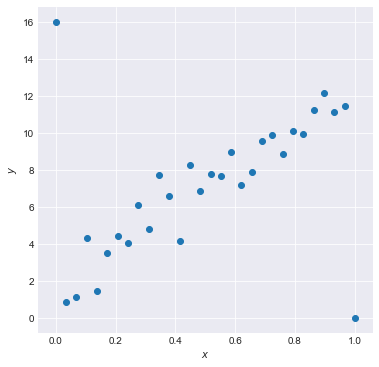

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

In [17]:
def fun_obj1(b, x, y):
    return np.sum((y-b[0]-b[1]*x)**2)

b0 = np.random.random((2,))

res = opt.minimize(fun_obj1, b0, args=(x,y))
yhat = np.array([x**j for j in range(2)]).T.dot(res.x)

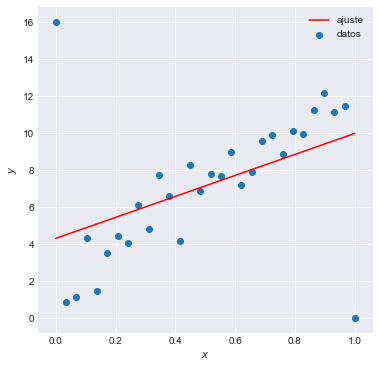

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre.

**¿Cómo podemos evitar esto?** La respuesta es *ajuste robusto*.

In [19]:
def huber(a, d):
    if np.abs(a)<=d:
        return a**2
    else:
        return d*(2*np.abs(a)-d)

def obj_robust(b, x, y, n, d):
    return np.sum(np.vectorize(huber)(y-np.array([x**i for i in range(n+1)]).T.dot(b), 1.345))

b0 = np.random.random((2,))
res = opt.minimize(obj_robust, b0, args=(x,y,1,1.345))
yhat = np.array([x**j for j in range(2)]).T.dot(res.x)

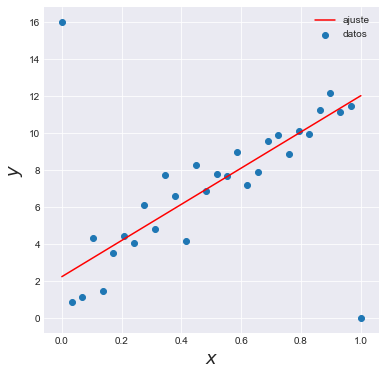

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.grid(True)
plt.show()